### Customer Churn
The main purpose of the classifier is to predict which clients are most likey to abandon the telecommunication company. It is a known fact that to keep existing customer is much cheaper than trying to acquire new ones, it includes lost revenue on the customers that left and the marketing cost of looking for new clients. Being able to predict customer churn rate allows companies to optimize their marketing focus and create more meaningful relationship with its consumers, among other economic and service-oriented benefits. 


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing dataset
data = pd.read_csv('cust_churn.csv')
data.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
# Checking columns format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
tenure      200 non-null float64
age         200 non-null float64
address     200 non-null float64
income      200 non-null float64
ed          200 non-null float64
employ      200 non-null float64
equip       200 non-null float64
callcard    200 non-null float64
wireless    200 non-null float64
longmon     200 non-null float64
tollmon     200 non-null float64
equipmon    200 non-null float64
cardmon     200 non-null float64
wiremon     200 non-null float64
longten     200 non-null float64
tollten     200 non-null float64
cardten     200 non-null float64
voice       200 non-null float64
pager       200 non-null float64
internet    200 non-null float64
callwait    200 non-null float64
confer      200 non-null float64
ebill       200 non-null float64
loglong     200 non-null float64
logtoll     200 non-null float64
lninc       200 non-null float64
custcat     200 non-null float64
chur

In [4]:
# Checking number of rows and columns,
# names of all the columns,
# as well as checking for missing values
# and number of unique valus per column.
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  200
Columns  :  28

Features : 
 ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat', 'churn']

Missing values :   0

Unique values :  
 tenure       68
age          51
address      40
income      101
ed            5
employ       35
equip         2
callcard      2
wireless      2
longmon     157
tollmon      65
equipmon     82
cardmon      92
wiremon      57
longten     198
tollten      99
cardten     124
voice         2
pager         2
internet      2
callwait      2
confer        2
ebill         2
loglong     157
logtoll      65
lninc       101
custcat       4
churn         2
dtype: int64


Text(0.5, 1.0, 'Distribution of Customer Churn')

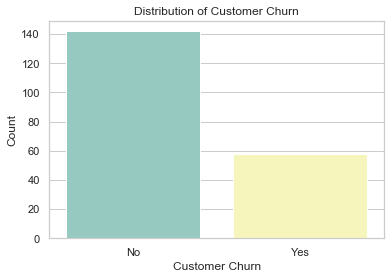

In [5]:
# Checking proportion of customers who left vs those who haven't
sns.set(style="whitegrid")

ax=sns.countplot(x='churn',palette="Set3", data=data)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
ax.set_title("Distribution of Customer Churn")


In [6]:
# Checking how the features are correlated with the dependent variable
corr_data = data.corr()
corr_churn = corr_data['churn']
corr_churn.sort_values(ascending=False)

churn       1.000000
equip       0.275284
equipmon    0.255348
ebill       0.254838
internet    0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
tollmon     0.014356
callwait   -0.052885
tollten    -0.059482
logtoll    -0.070156
confer     -0.081361
income     -0.090790
lninc      -0.117459
cardmon    -0.177163
cardten    -0.228634
address    -0.260659
age        -0.287697
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

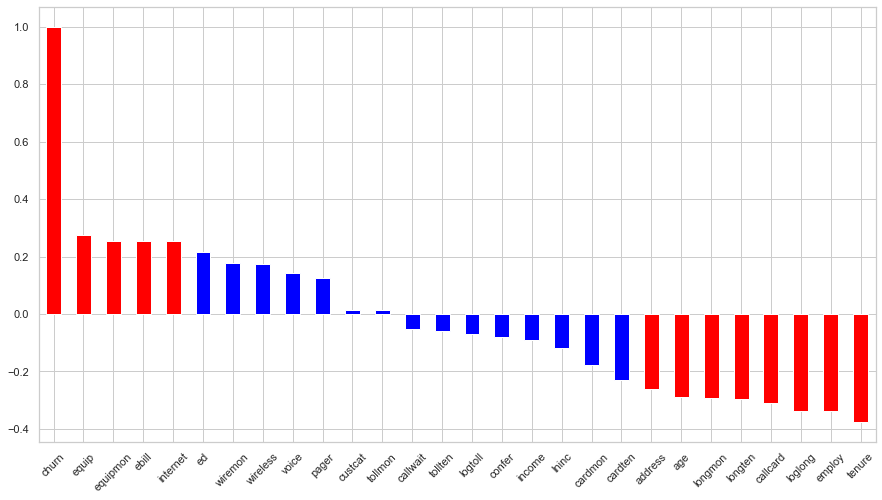

In [17]:
# Visualizing the features with highest correlation with the dependent variable
plt.figure(figsize=(15,8))

corr_bars = data.corr()['churn'].sort_values(ascending = False)
colours = []
for val in corr_bars:
    if val <= -0.25:
        colours.append('red')
    elif val >= 0.25:
        colours.append('red')
    else:
        colours.append('blue')
corr_bars.plot(kind='bar', color=colours)
plt.xticks(rotation=45)

## Features with high corr.coefficient
### tenure, employ, loglong, callcard, longten, longmon, age, equip, address, equipmon, ebill, internet, cardten

In [18]:
# Several combinations of the features with high correlation coefficient were tested, 
# the one below gave the best accuracy score
X = data[['tenure', 'employ', 'internet', 'age']]
y = data['churn']

In [19]:
# Splitting the dataset,
# using 'stratify=y' parameter to insure the same proportion of the values
# in the test set as in the train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Standardizing the features with the StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
# Measuring accuracy of the model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
acc_score = accuracy_score(y_test, y_pred)
jacc_index = jaccard_score(y_test, y_pred)
loss = log_loss(y_test, y_pred)
print('Accuracy score = {:.3f}'.format(acc_score))
print('Jaccard Index = {:.3f}'.format(jacc_index))
print('Log Loss = {:.3f}'.format(loss))

Accuracy score = 0.775
Jaccard Index = 0.438
Log Loss = 7.771


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[24  4]
 [ 5  7]]


In [25]:
# Testing different solvers to optimize the model 
from sklearn.model_selection import GridSearchCV
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, random_state=42)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  liblinear 0.750
  newton-cg 0.744
  lbfgs 0.744
  sag 0.744
  saga 0.744


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model performed best without solvers.